In [1]:
!pip install sentence-transformers

In [2]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score,recall_score, precision_score, ConfusionMatrixDisplay, classification_report

### 2. Loading the data

In [4]:

def load_data(filename):
    l= []
    f = open(filename)
    for i in f.readlines():
        i = i.replace("\n","")
        s = i.split(' | ')
        l.append(s)
    f.close()
    df = pd.DataFrame(l, columns = ['entity1', 'entity2', 'relation'])  
    return df

In [5]:
df_train = load_data("/kaggle/input/testing/train.txt")
df_val = load_data("/kaggle/input/testing/val.txt")
df_test = load_data("/kaggle/input/testing/test.txt")

### 3. Generating sentence Embeddings

In [6]:
def get_embeddings(df):
    X = []
    y = []
    for i in range(len(df)):
        
        embeddings1 = model.encode(df['entity1'][i], show_progress_bar=False)
        embeddings2 = model.encode(df['entity2'][i], show_progress_bar=False)
        X.append(np.concatenate((embeddings1,embeddings2)))
        y.append(int(df['relation'][i]))
        
    return X, y
X_train, y_train = get_embeddings(df_train)
X_val, y_val = get_embeddings(df_val)
X_test, y_test = get_embeddings(df_test)

In [7]:
X_train[0].shape

(768,)

### 3. Training the classifier

In [8]:
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

### 4. Prediction and Evaluation

In [9]:
y_pred = classifier.predict(X_test)

Confusion Matrix : 


Text(0.5, 0.98, 'Plot of confusion matrix')

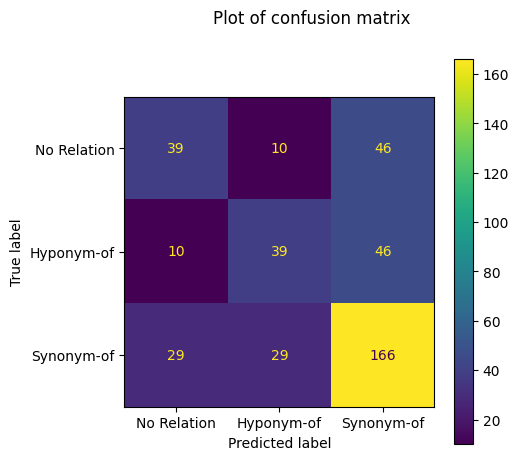

In [10]:
print("Confusion Matrix : ")
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels = ["No Relation","Hyponym-of","Synonym-of"])
# ,cmap=plt.cm.Reds)
fig = display.figure_
fig.set_figwidth(5)
fig.set_figheight(5) 
fig.suptitle('Plot of confusion matrix')

In [11]:
cr = classification_report(y_test, y_pred ,target_names=["No Relation","Hyponym-of","Synonym-of"])
print(cr)

              precision    recall  f1-score   support

 No Relation       0.50      0.41      0.45        95
  Hyponym-of       0.50      0.41      0.45        95
  Synonym-of       0.64      0.74      0.69       224

    accuracy                           0.59       414
   macro avg       0.55      0.52      0.53       414
weighted avg       0.58      0.59      0.58       414



In [12]:
print("F1 Scores : ", f1_score(y_test, y_pred, average="macro"))
print("Recall Score : ", recall_score(y_test, y_pred, average="macro"))
print("Precision Score : ", precision_score(y_test, y_pred, average="macro"))

F1 Scores :  0.5301769281813894
Recall Score :  0.5207080200501254
Precision Score :  0.5478036175710594
